# Synthetic Graph Generation

Look at example data from Oliver as base for creating a synthetic, large dataset

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as NX
import time
import datetime
import os,sys

FILENAME_SMALL="../data/mdanalysis/small/graph_edges_95_215.csv"
FILENAME_MEDIUM="../data/mdanalysis/medium/graph_edges_24056_71826.csv"
OUTPUT_DIR="../data/mdanalysis/synthetic/"
!head -n 5 {FILENAME_MEDIUM}


start = time.time()
nxg = NX.read_edgelist(FILENAME_MEDIUM, delimiter=",")
end_read = time.time()
#NX.draw(nxg, pos=NX.spring_layout(nxg))

In [1]:
!head ../data/mdanalysis/medium/graph_edges_24056_71826.csv

0,0
0,17369
0,17306
0,179
0,17446
1,1
1,2147
1,7
1,3886
1,20150


Length: 24056


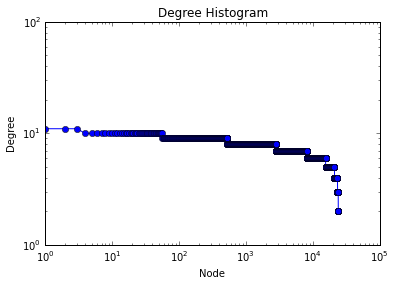

In [3]:
degree_sequence=sorted(NX.degree(nxg).values(),reverse=True) # degree sequence
print "Length: %d" % len(degree_sequence)
dmax=max(degree_sequence)
plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree Histogram")
plt.ylabel("Degree")
plt.xlabel("Node")

# Data Generation


In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
series = pd.Series(NX.degree(nxg).values())
series.describe()

count    24056.000000
mean         5.971566
std          1.305737
min          2.000000
25%          5.000000
50%          6.000000
75%          7.000000
max         12.000000
dtype: float64

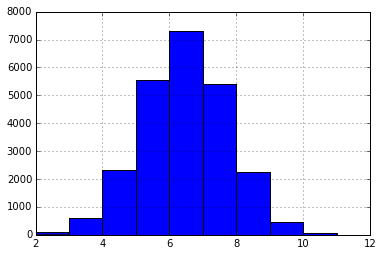

In [5]:
series.hist()

In [6]:
number_of_nodes=[145746]
for number in number_of_nodes:
    degree_vector = np.random.normal(series.mean(), series.std(), number)
    graph = NX.expected_degree_graph(degree_vector)
    NX.write_edgelist(graph,
                      os.path.join(OUTPUT_DIR, 
                        "graph_edges_%d_%d.csv"%(number, NX.number_of_edges(graph))),
                      delimiter=",")

In [10]:
!ls ../data/mdanalysis/synthetic

graph_edges_10000_29900.csv    graph_edges_20000_59671.csv
graph_edges_145746_435524.csv  graph_edges_30000_89157.csv
